In [1]:
# Initalize important stuff
import xspec as xs
import matplotlib.pyplot as plt, numpy as np, pandas as pd
import matplotlib.ticker as mticker
import seaborn as sns
sns.set(style='dark')
import time
from IPython.display import clear_output
def clear(): time.sleep(0.1), clear_output()

xs.AllModels.lmod("acx", "/home/vatsal/soft/atomdbcx/xspec")

Model package acx successfully loaded.


In [2]:
# Load XMM data
data_file_to_be_used = 'north_080420_src_bin10.ds'

xs.AllData.clear()
northaurora = xs.Spectrum(data_file_to_be_used)
xs.Plot.xAxis = "keV"
northaurora.ignore("**-**")
northaurora.notice("0.25-2.5")

clear()

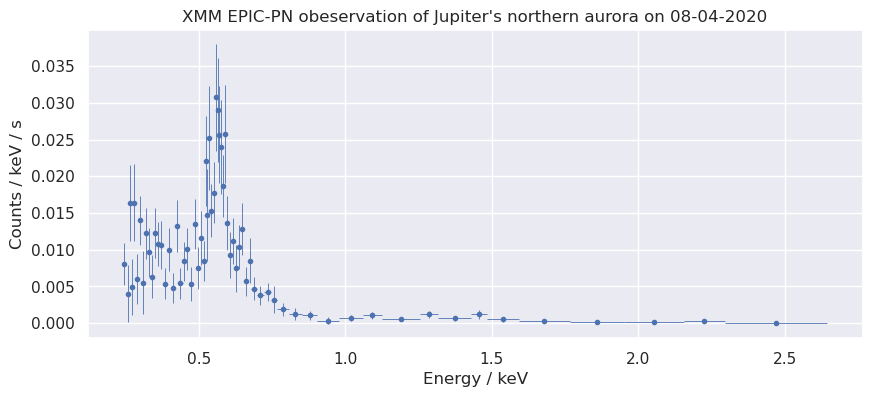

In [3]:
# Plot the XMM data
xs.Plot('data')
xmm_df = pd.DataFrame({'x_xmm':xs.Plot.x(), 'y_xmm':xs.Plot.y(), 'xerr_xmm':xs.Plot.xErr(), 'yerr_xmm':xs.Plot.yErr()})

plt.figure(figsize=(10,4))
plt.errorbar(x=xmm_df.x_xmm, y=xmm_df.y_xmm, xerr=xmm_df.xerr_xmm, yerr=xmm_df.yerr_xmm, fmt='.', elinewidth=0.6)
plt.title("XMM EPIC-PN obeservation of Jupiter's northern aurora on 08-04-2020")
plt.xlabel('Energy / keV')
plt.ylabel('Counts / keV / s')
plt.grid(color='w')

In [4]:
# Load models
model_to_be_used = 'vacx'

m = xs.Model(model_to_be_used)

if model_to_be_used=='apec':
    m(1).values = 0.18  		# plasma temp kT
    m(2).values = 0.1 			# Abundance
    m(3).values = 0 			# Redshift
    m(4).values = 1e-6			# Norm

elif model_to_be_used=='vacx':
    m(1).values = 0.164071 		# plasma temp kT
    m(2).values = 0.1 			# He
    m(3).values = 0 			# C
    m(4).values = 0 			# N
    m(5).values = 0.297569 		# O
    m(6).values = 0 			# Ne
    m(7).values = 0 			# Mg
    m(8).values = 0 			# Al
    m(9).values = 0 			# Si
    m(10).values= 8.23918 		# S
    m(11).values= 0 			# Ar
    m(12).values= 0 			# Ca
    m(13).values= 0 			# Fe
    m(14).values= 0 			# Ni
    m(15).values= 0 			# redshift
    m(16).values= 0 			# swcx
    m(17).values= 5	 			# model
    m(18).values= 1.40847e-06	# norm

# Freeze parameters you don't like
m(2).frozen = True
m(5).frozen = False
m(10).frozen = False

xs.Fit.nIterations = 50
xs.Fit.perform()

clear()

In [5]:
# Saving our model

!rm test.xcm                     # Set name for model to be saved
xs.Xset.save('test.xcm')        # Set name for model to be saved
xs.AllModels.clear()
xs.Xset.restore('test.xcm')     # Set name for model to be saved
clear()

In [6]:
# Make fake spectrum in LEM
response_file = 'lem_09ev_110422.rmf'
arf_file      = 'lem_110422.arf'
exposure_time = '144000'

!rm test.fak                # Set fake file name
xs.AllData.clear()
fs = xs.FakeitSettings(response=response_file, arf=arf_file, exposure=exposure_time)
fs.fileName = 'test.fak'    # Set fake file name
xs.AllData.fakeit(1,fs)
xs.Fit.nIterations = 50
xs.Fit.perform()

clear()

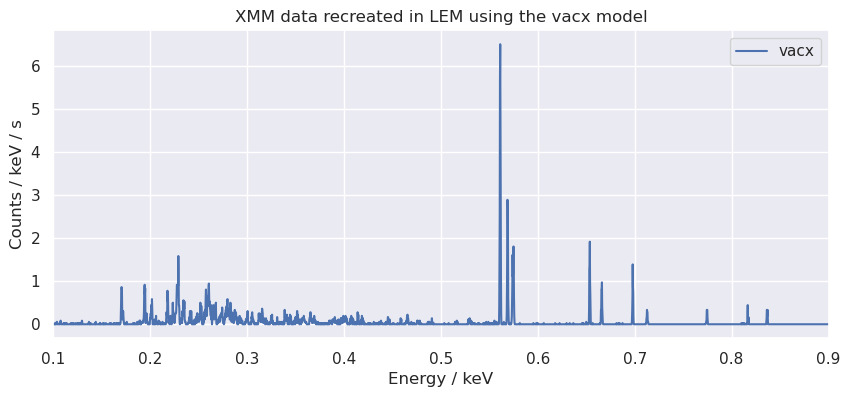

In [7]:
# Plot LEM spectra
xs.Plot('data')
lem_df = pd.DataFrame({'x_lem':xs.Plot.x(), 'y_lem':xs.Plot.y(), 'xerr_lem':xs.Plot.xErr(), 'yerr_lem':xs.Plot.yErr()})

plt.figure(figsize=(10,4))
plt.plot(lem_df.x_lem, lem_df.y_lem, label=model_to_be_used)
plt.xlim(0.1, 0.9)
plt.title("XMM data recreated in LEM using the " + model_to_be_used + " model")
plt.xlabel('Energy / keV'), plt.ylabel('Counts / keV / s')
plt.legend()
plt.grid(color='w')

In [8]:
# Saving the dataframes for later use

# xmm_df.to_csv(r'xmm_df.csv', index=False)
# lem_df.to_csv(r'lem_vacx_m5_df.csv', index=False)